In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [309]:
california_df = pd.read_excel(r'1553768847_housing.xlsx')
print(california_df.shape)
print(california_df.describe())

(20640, 10)
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%     

In [310]:
print(california_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [311]:
california_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [312]:
california_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [313]:
california_df['total_bedrooms'].fillna(california_df['total_bedrooms'].mean(), inplace=True)

In [314]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in california_df.columns:
    california_df[i] = le.fit_transform(california_df[i])

In [315]:
california_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,170,515,40,733,128,296,125,12416,3,3665
1,171,513,20,5255,1104,2346,1129,12411,3,3074
2,169,512,51,1316,189,469,176,11941,3,3017
3,168,512,51,1123,234,531,218,10269,3,2917
4,168,512,51,1476,279,538,258,6656,3,2925


# Dataset Description :
# -Variable and Description
●	longitude (signed numeric - float) : Longitude value for the block in California, USA
●	latitude (numeric - float ) : Latitude value for the block in California, USA
●	housing_median_age (numeric - int ) : Median age of the house in the block
●	total_rooms (numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
●	total_bedrooms (numeric - float ) : Count of the total number of bedrooms in all houses in the block
●	population (numeric - int ) : Count of the total number of population in the block
●	households (numeric - int ) : Count of the total number of households in the block
●	median_income (numeric - float ) : Median of the total household income of all the houses in the block
●	ocean_proximity (numeric - categorical ) : Type of the landscape of the block
[ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
●	median_house_value (numeric - int ) : Median of the household prices of all the houses in the block


In [316]:
x = california_df.drop('median_house_value', axis=1)
y = california_df['median_house_value']

In [317]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

In [318]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128,)


In [319]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [320]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train_sc, y_train)
lrmodel_pred = lrmodel.predict(x_test_sc)

In [321]:
from sklearn.metrics import mean_squared_error
lrmodelRMSE = np.sqrt(mean_squared_error(lrmodel_pred, y_test))
print("RMSE for linear regression model is: ", lrmodelRMSE)

RMSE for linear regression model is:  637.8190679973064


In [322]:
from sklearn.tree import DecisionTreeRegressor
decisiontreemodel = DecisionTreeRegressor()
decisiontreemodel.fit(x_train_sc, y_train)
decisiontreemodel_pred = decisiontreemodel.predict(x_test_sc)

In [323]:
decisiontreemodel_RMSE = np.sqrt(mean_squared_error(decisiontreemodel_pred, y_test))
print("RMSE for decision tree regression model is: ", decisiontreemodel_RMSE)

RMSE for decision tree regression model is:  664.5718985796668


In [324]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(x_train_sc, y_train)
rfmodel_pred = rfmodel.predict(x_test_sc)

In [325]:
rfmodel_RMSE = np.sqrt(mean_squared_error(rfmodel_pred, y_test))
print("RMSE for Random Forest regression model is: ", rfmodel_RMSE)

RMSE for Random Forest regression model is:  474.54651787343187


In [326]:
x_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [327]:
x_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [328]:
x_train_median = x_train['median_income']
x_test_median = x_test['median_income']

In [329]:
lrmodel.fit(x_train_median.values.reshape(-1,1), y_train.values.reshape(-1,1))
median_test_pred = lrmodel.predict(x_test_median.values.reshape(-1,1))
median_train_pred = lrmodel.predict(x_train_median.values.reshape(-1,1))

In [330]:
median_train_RMSE = np.sqrt(mean_squared_error(median_train_pred, y_train))
print("RMSE for train median_income linear regression model is: ", median_train_RMSE)

RMSE for train median_income linear regression model is:  753.4291161572626


In [331]:
median_test_RMSE = np.sqrt(mean_squared_error(median_test_pred, y_test))
print("RMSE for test median_income linear regression model is: ", median_test_RMSE)

RMSE for test median_income linear regression model is:  761.991604825971


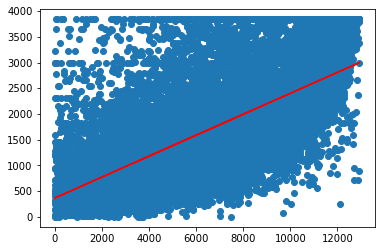

In [332]:
plt.scatter(x_train_median, y_train)
plt.plot(x_train_median, median_train_pred, color='red')
plt.show()

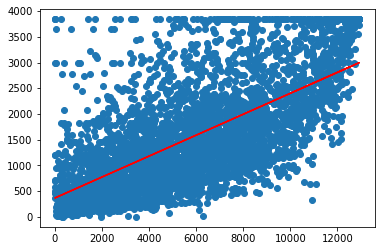

In [333]:
plt.scatter(x_test_median, y_test)
plt.plot(x_test_median, median_test_pred, color='red')
plt.show()


# Random Forest Regression Model is the better model when prediction median house value using all independent variables, so we can use it as the final model